In [1]:
import numpy as np, pandas as pd , matplotlib.pyplot as plt , seaborn  as sns 
from glob import glob
from fetch_data import fetch_data

In [2]:
data_tournament = fetch_data(20240201,20240331,'tournament')

In [4]:
unique_columns= ["tournament_slug"]
data_tournament = data_tournament.drop_duplicates(subset=unique_columns)
data_tournament = data_tournament[["tournament_id","tournament_name","ground_type"]]

In [5]:
data_tournament["ground_type"] = data_tournament["ground_type"].fillna("not mentioned")

In [6]:
data = (data_tournament["ground_type"]
                        .value_counts(normalize=True)
                        .mul(100).to_frame()
                        .reset_index()
                        .sort_values('proportion')
                        )

data.to_csv("../data/external/14/ground_type_proportions.csv",index=False)


data

,ground_type,proportion
7,Synthetic outdoor,0.574713
6,Carpet indoor,0.957854
4,Grass,1.149425
5,Red clay indoor,1.149425
3,not mentioned,1.532567
2,Hardcourt indoor,15.900383
1,Red clay,34.482759
0,Hardcourt outdoor,44.252874


In [7]:
most_common_type_of_surface= data.iloc[-1]['ground_type']
most_common_type_of_surface

'Hardcourt outdoor'

<h1>Plot</h1>

In [8]:
data = data.assign(ground_color= lambda x: np.where(x["ground_type"] == most_common_type_of_surface ,"#FF5A5F","#808080"))

In [9]:
data

,ground_type,proportion,ground_color
7,Synthetic outdoor,0.574713,#808080
6,Carpet indoor,0.957854,#808080
4,Grass,1.149425,#808080
5,Red clay indoor,1.149425,#808080
3,not mentioned,1.532567,#808080
2,Hardcourt indoor,15.900383,#808080
1,Red clay,34.482759,#808080
0,Hardcourt outdoor,44.252874,#FF5A5F


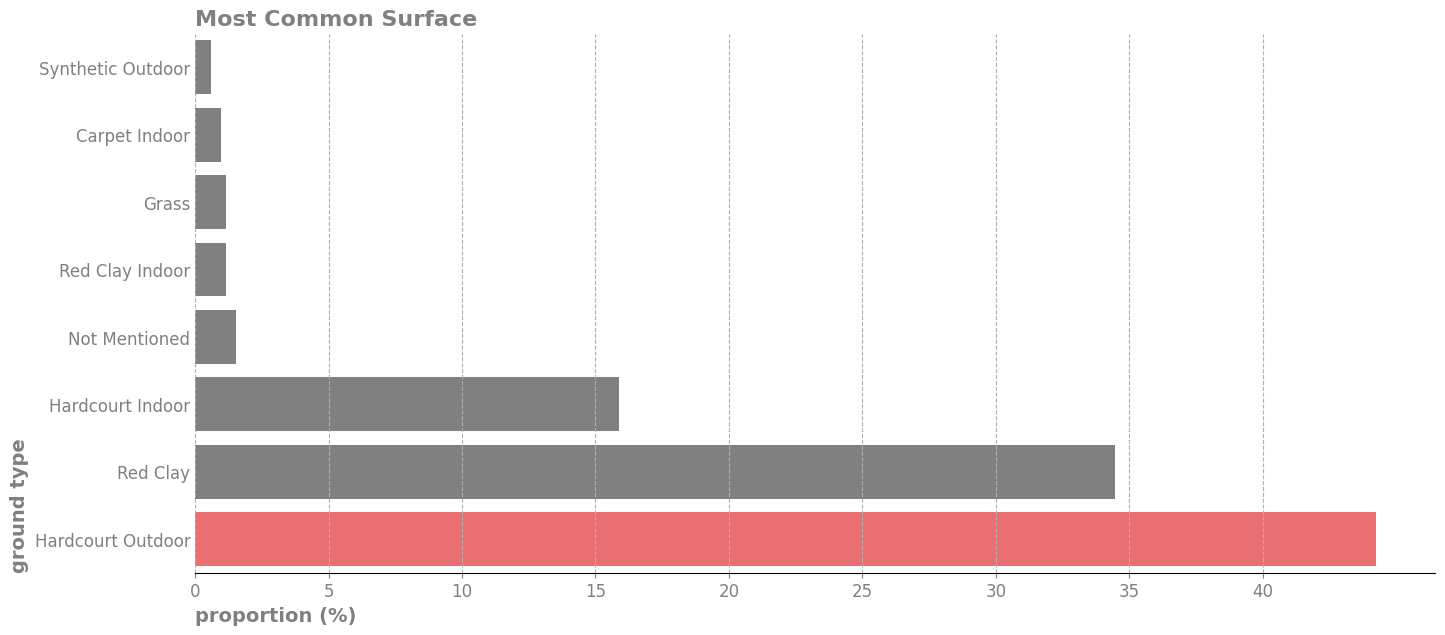

In [10]:
fig , ax = plt.subplots(figsize = (16,7))
sns.barplot(
    data=data,
    x='proportion',
    y='ground_type',
    hue= 'ground_type',
    palette= list(data["ground_color"].values),
    ax=ax
)


ax.spines[['top','right','left']].set_visible(False)

ax.set_title('Most Common Surface',loc='left',weight='bold',color = 'gray',fontsize=16)

ax.set_xlabel('proportion (%)',loc='left',weight='bold',color = 'gray',fontsize=14)
ax.set_ylabel('ground type',loc='bottom',weight='bold',color = 'gray',fontsize=14)


ax.tick_params(axis='x',colors = 'gray',labelsize = 'large')
ax.tick_params(axis='y',colors = 'gray',labelsize = 'large')
ax.tick_params(axis='y',which = 'major',length = 0)

ax.grid(axis='x',linestyle = 'dashed')

ax.set_yticks(
    labels=[ground.title()  for ground in data["ground_type"]],
    ticks= range(len(data["ground_type"]))
)


ax.set_xticks(
    ticks= range(int(data["proportion"].min()),
                 int(np.ceil(data["proportion"].max())),
                 5)
)

plt.savefig("../reports/figures/14/ground_type_proportions.png",dpi=300)



plt.show()